## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


## DATA LOADING

In [67]:
df = pd.read_csv('dataset.csv')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [68]:
df.shape

(4424, 35)

## Data Cleaning and Preprocessing

### Clean column names

In [69]:
df.rename(columns = {"Nacionality": "Nationality",
                           "Mother's qualification": "Mother_qualification",
                           "Father's qualification": "Father_qualification",
                           "Mother's occupation": "Mother_occupation",
                           "Father's occupation": "Father_occupation",
                           "Age at enrollment": "Age"}, inplace = True)

# Replace white space in he columns name with underscore
df.columns =df.columns.str.replace(' ','_')

# Remove the parenthesis

df.columns = df.columns.str.replace('(','')
df.columns = df.columns.str.replace(')','')
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime/evening_attendance', 'Previous_qualification', 'Nationality',
       'Mother_qualification', 'Father_qualification', 'Mother_occupation',
       'Father_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age',
       'International', 'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
       'Inflation_rate', 'GDP', 'Target'],


### DATA TYPE CONVERSION

In [70]:
categorical_cols = ['Marital_status', 'Application_mode', 'Application_order', 'Course',
      'Daytime/evening_attendance', 'Previous_qualification', 'Nationality',
       'Mother_qualification', 'Father_qualification', 'Mother_occupation',
       'Father_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
      'International', 'Target']

df[categorical_cols]= df[categorical_cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   category
 1   Application_mode                              4424 non-null   category
 2   Application_order                             4424 non-null   category
 3   Course                                        4424 non-null   category
 4   Daytime/evening_attendance                    4424 non-null   category
 5   Previous_qualification                        4424 non-null   category
 6   Nationality                                   4424 non-null   category
 7   Mother_qualification                          4424 non-null   category
 8   Father_qualification                          4424 non-null   category
 9   Mother_occupation                             4424 n

In [71]:
# Numerical columns
numerical_cols = [col for col in df.columns if col not in categorical_cols]
numerical_cols

['Age',
 'Curricular_units_1st_sem_credited',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_without_evaluations',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP']

In [72]:
# target_classes = df['Target'].unique()
# print("\nTarget Variable Classes:", target_classes)

# # If no meaningful order exists (teacher's recommendation):
# df['Target'] = df['Target'].astype('category')  # Nominal categorical

In [73]:
df.dtypes

Marital_status                                  category
Application_mode                                category
Application_order                               category
Course                                          category
Daytime/evening_attendance                      category
Previous_qualification                          category
Nationality                                     category
Mother_qualification                            category
Father_qualification                            category
Mother_occupation                               category
Father_occupation                               category
Displaced                                       category
Educational_special_needs                       category
Debtor                                          category
Tuition_fees_up_to_date                         category
Gender                                          category
Scholarship_holder                              category
Age                            

### MISSING VALUE DETECTION

In [74]:
def detect_missing_values(df):
    # Detect standard missing values
    missing = df.isna().sum()

    # Detect disguised missing values (0s where inappropriate)
    disguised = {}
    for col in numerical_cols:
        if 'grade' in col.lower():
            disguised[col] = (df[col] == 0).sum()
        elif 'age' in col.lower():
            disguised[col] = (df[col] <= 0).sum()

    return missing, disguised

missing_std, missing_disguised = detect_missing_values(df)

print("Standard missing values:")
print(missing_std[missing_std > 0])
print("\nDisguised missing values:")
print(pd.Series(missing_disguised))

Standard missing values:
Series([], dtype: int64)

Disguised missing values:
Age                                 0
Curricular_units_1st_sem_grade    718
Curricular_units_2nd_sem_grade    870
dtype: int64


### Handle graduates with 0 grades (invalid data)

In [75]:
df = df[~((df['Target'] == 'Graduate') &
        ((df['Curricular_units_1st_sem_grade'] == 0) |
         (df['Curricular_units_2nd_sem_grade'] == 0)))]

Overall Purpose: This code removes rows where:

The student's Target is 'Graduate' AND

Either their first semester grade (Curricular_units_1st_sem_grade) is 0 OR their second semester grade (Curricular_units_2nd_sem_grade) is 0

In [76]:
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime/evening_attendance', 'Previous_qualification', 'Nationality',
       'Mother_qualification', 'Father_qualification', 'Mother_occupation',
       'Father_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age',
       'International', 'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
       'Inflation_rate', 'GDP', 'Target'],


In [77]:
## Step 1: Proper Data Type Identification
def identify_data_types(df):
    data_types = pd.DataFrame(index=df.columns, columns=['DataType', 'MeasurementLevel'])

    for col in df.columns:
        # Check if numeric
        if pd.api.types.is_numeric_dtype(df[col]):
            # Check if it's actually categorical (limited unique values)
            if df[col].nunique() < 10:
                data_types.loc[col] = ['Categorical', 'Nominal']
            else:
                data_types.loc[col] = ['Numerical', 'Continuous']
        else:
            data_types.loc[col] = ['Categorical', 'Nominal']

    return data_types

data_types = identify_data_types(df)
print("Data Type Identification:")
print(data_types)


Data Type Identification:
                                                 DataType MeasurementLevel
Marital_status                                Categorical          Nominal
Application_mode                              Categorical          Nominal
Application_order                             Categorical          Nominal
Course                                        Categorical          Nominal
Daytime/evening_attendance                    Categorical          Nominal
Previous_qualification                        Categorical          Nominal
Nationality                                   Categorical          Nominal
Mother_qualification                          Categorical          Nominal
Father_qualification                          Categorical          Nominal
Mother_occupation                             Categorical          Nominal
Father_occupation                             Categorical          Nominal
Displaced                                     Categorical          Nominal

In [78]:
target_classes = df['Target'].unique()
print("\nTarget Variable Classes:", target_classes)

# If no meaningful order exists (teacher's recommendation):
df['Target'] = df['Target'].astype('category')  # Nominal categorical


Target Variable Classes: ['Dropout', 'Graduate', 'Enrolled']
Categories (3, object): ['Dropout', 'Enrolled', 'Graduate']


/var/folders/qb/8q46b91x0jvbcmpx5sk7229c0000gn/T/ipykernel_18737/1195365461.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Target'].astype('category')  # Nominal categorical


Shows all distinct categories in the target variable

Helps understand what values the target can take (e.g., 'Graduate', 'Dropout', etc.)

Useful for data exploration before modeling


## EXPLORATORY DATA ANALYSIS

In [79]:
# Generate separate summaries
print("Numerical Features Summary:")
display(df[numerical_cols].describe())

print("\nCategorical Features Summary:")
display(df[categorical_cols].describe(include=['category']))

Numerical Features Summary:


,Age,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4347.000000,4347.000000,4347.000000,4347.000000,4347.000000,4347.000000,4347.000000,4347.000000,4347.000000,4347.000000,4347.000000,4347.000000,4347.000000,4347.000000,4347.000000,4347.000000
mean,23.330573,0.722567,6.379342,8.442144,4.789970,10.829306,0.138946,0.551415,6.340235,8.202438,4.512307,10.405428,0.152519,11.566713,1.230090,0.003713
std,7.631588,2.379417,2.359902,4.069693,3.056879,4.672806,0.692820,1.934099,2.055477,3.836567,2.984008,5.078678,0.759944,2.667695,1.380975,2.274678
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19.000000,0.000000,5.000000,6.000000,3.000000,11.142857,0.000000,0.000000,5.000000,6.000000,2.000000,11.000000,0.000000,9.400000,0.300000,-1.700000
50%,20.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,0.000000,6.000000,8.000000,5.000000,12.250000,0.000000,11.100000,1.400000,0.320000
75%,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.395625,0.000000,13.900000,2.600000,1.790000
max,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000



Categorical Features Summary:


,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Nationality,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,International,Target
count,4347,4347,4347,4347,4347,4347,4347,4347,4347,4347,4347,4347,4347,4347,4347,4347,4347,4347,4347
unique,6,18,8,17,2,17,21,29,34,32,46,2,2,2,2,2,2,2,3
top,1,1,1,12,1,1,1,1,27,10,10,1,0,0,1,0,0,0,Graduate
freq,3843,1651,2975,766,3864,3644,4239,1052,1195,1551,995,2359,4298,3848,3822,2834,3275,4239,2132


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Curricular_units_1st_sem_credited'}>,
        <Axes: title={'center': 'Curricular_units_1st_sem_enrolled'}>,
        <Axes: title={'center': 'Curricular_units_1st_sem_evaluations'}>],
       [<Axes: title={'center': 'Curricular_units_1st_sem_approved'}>,
        <Axes: title={'center': 'Curricular_units_1st_sem_grade'}>,
        <Axes: title={'center': 'Curricular_units_1st_sem_without_evaluations'}>,
        <Axes: title={'center': 'Curricular_units_2nd_sem_credited'}>],
       [<Axes: title={'center': 'Curricular_units_2nd_sem_enrolled'}>,
        <Axes: title={'center': 'Curricular_units_2nd_sem_evaluations'}>,
        <Axes: title={'center': 'Curricular_units_2nd_sem_approved'}>,
        <Axes: title={'center': 'Curricular_units_2nd_sem_grade'}>],
       [<Axes: title={'center': 'Curricular_units_2nd_sem_without_evaluations'}>,
        <Axes: title={'center': 'Unemployment_rate'}>,
        <Axes: title={'cent

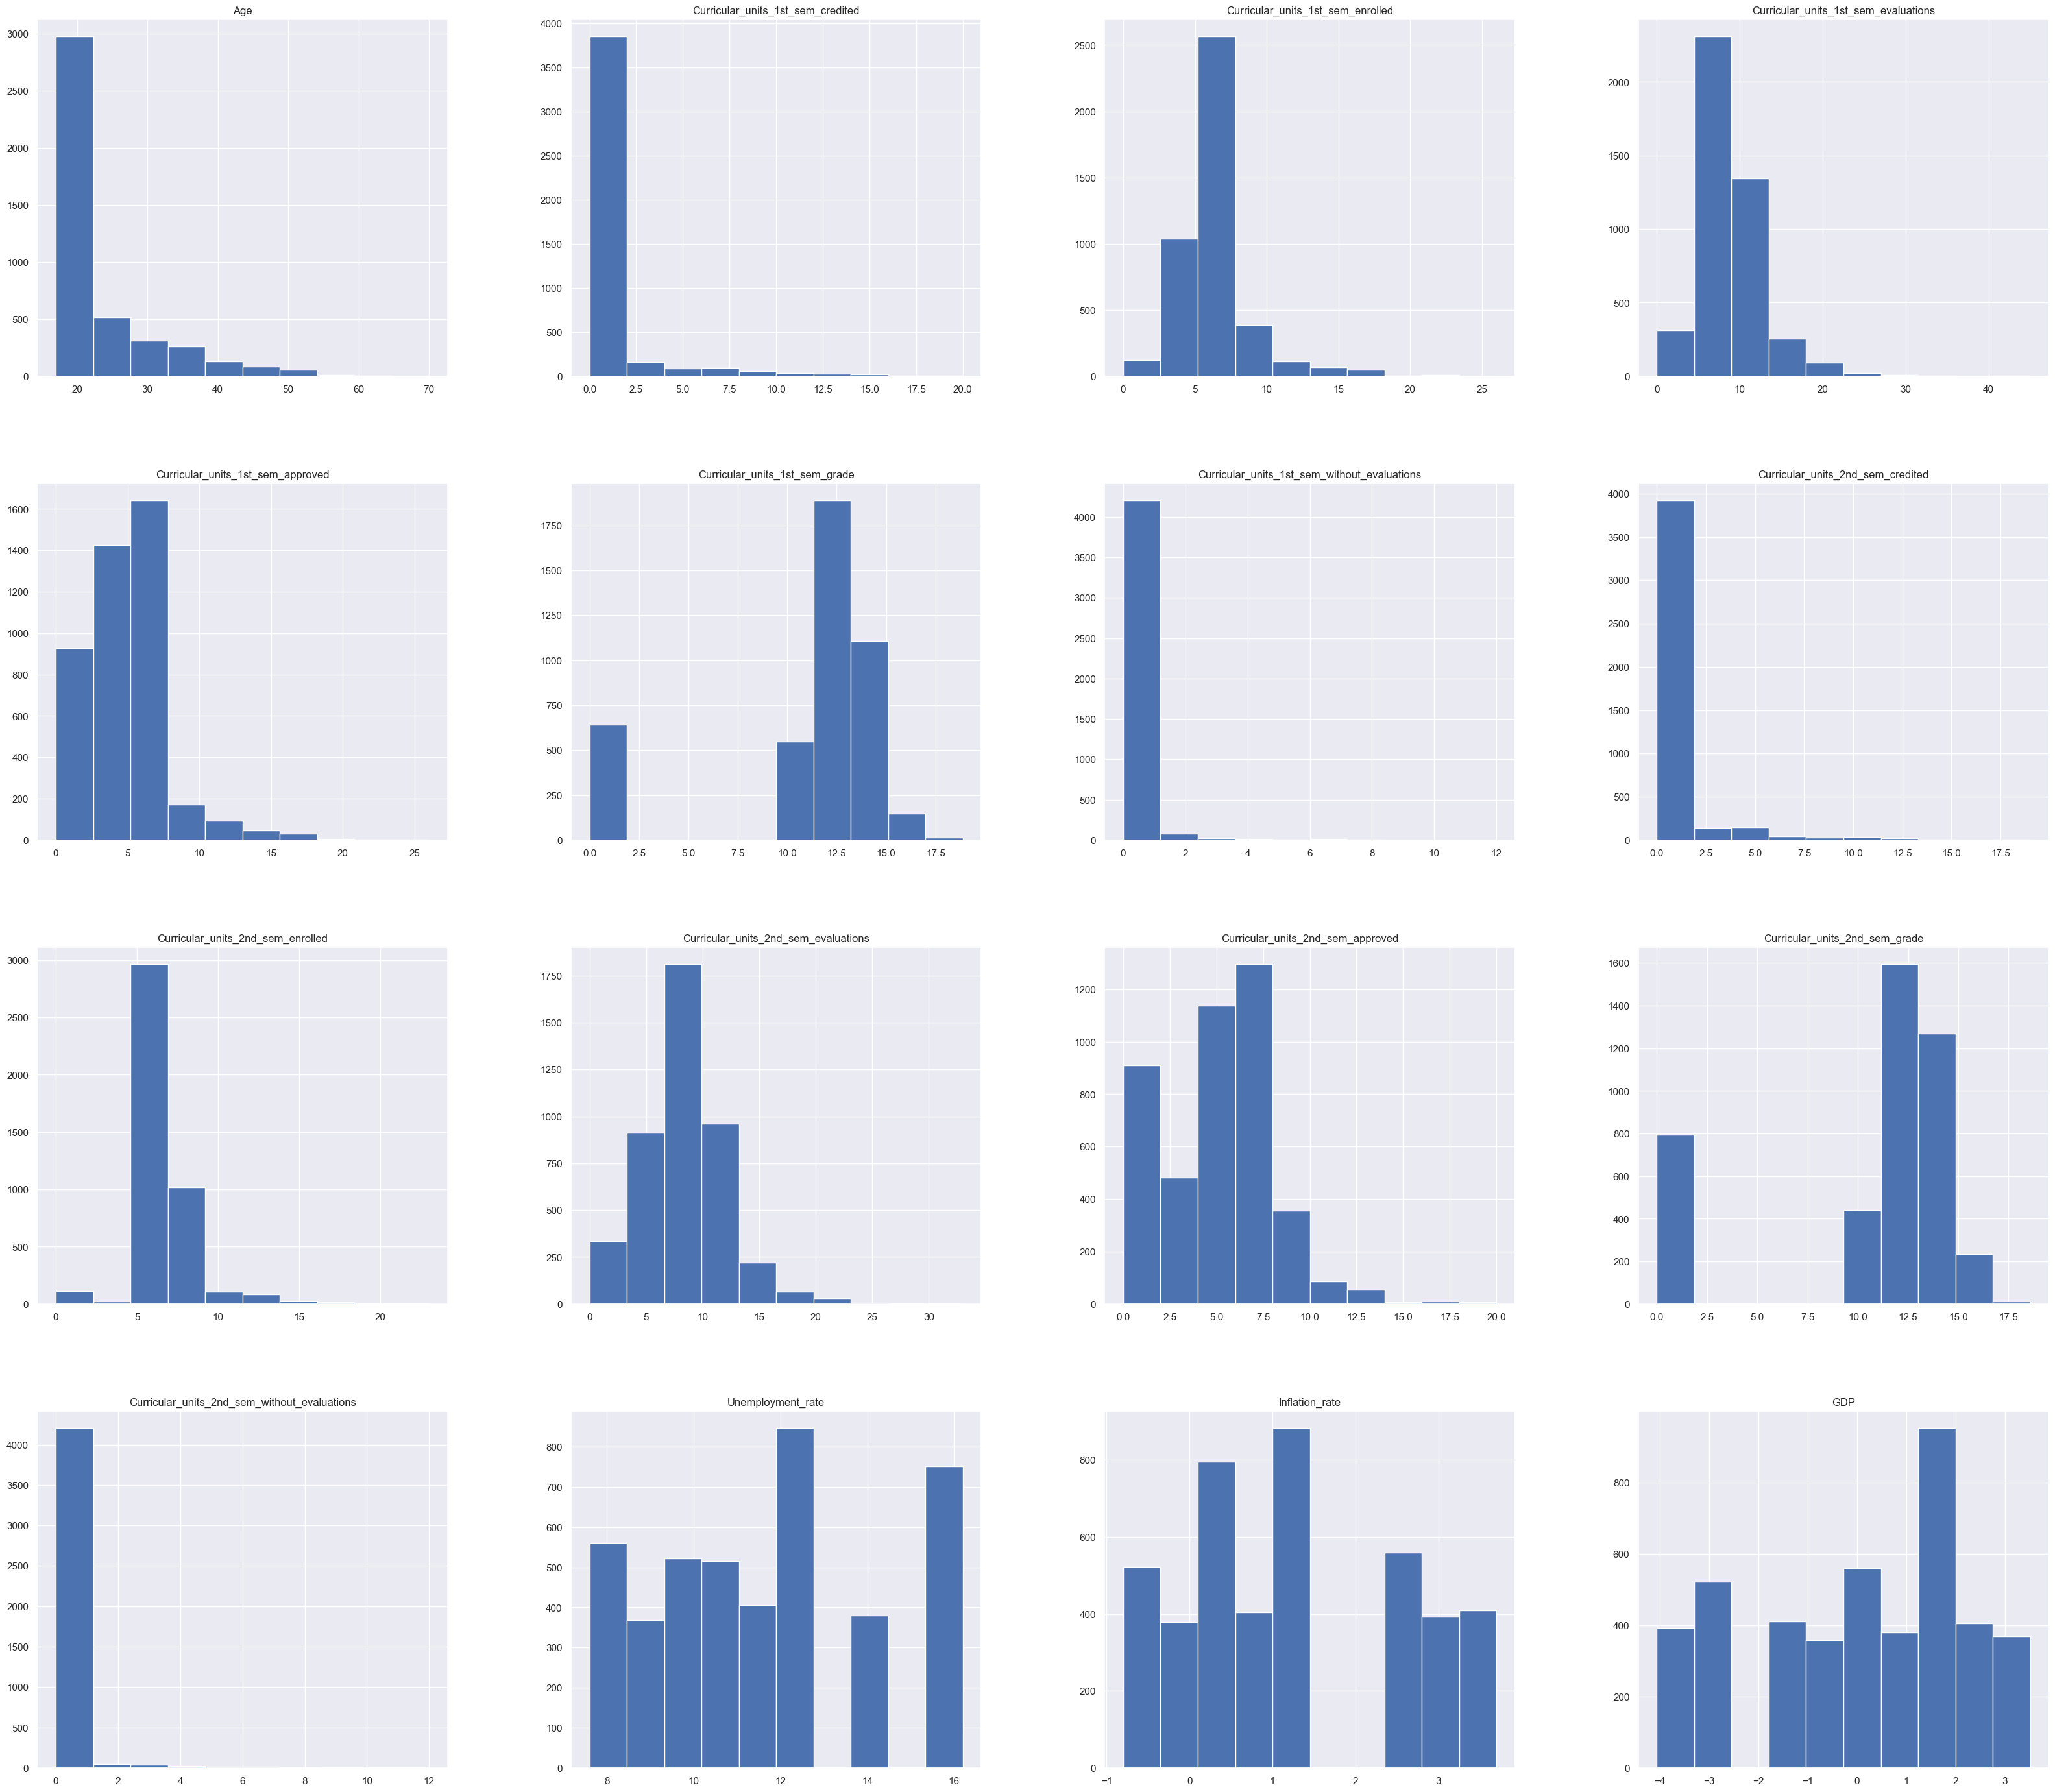

In [80]:
sns.set_theme(style ='darkgrid')
df.hist(bins=10,figsize=(40,35),grid=True,legend=None)

In [81]:
target = df['Target'].value_counts()
target

Target
Graduate    2132
Dropout     1421
Enrolled     794
Name: count, dtype: int64

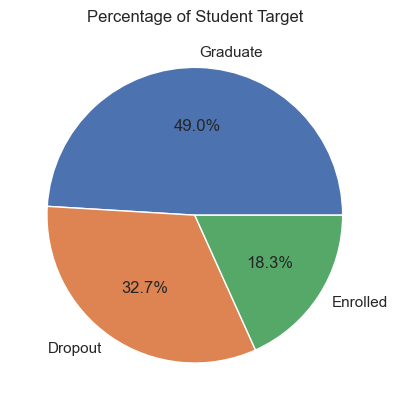

In [82]:
plt.pie(target,labels=target.index,autopct='%1.1f%%')
plt.title('Percentage of Student Target')
plt.show()

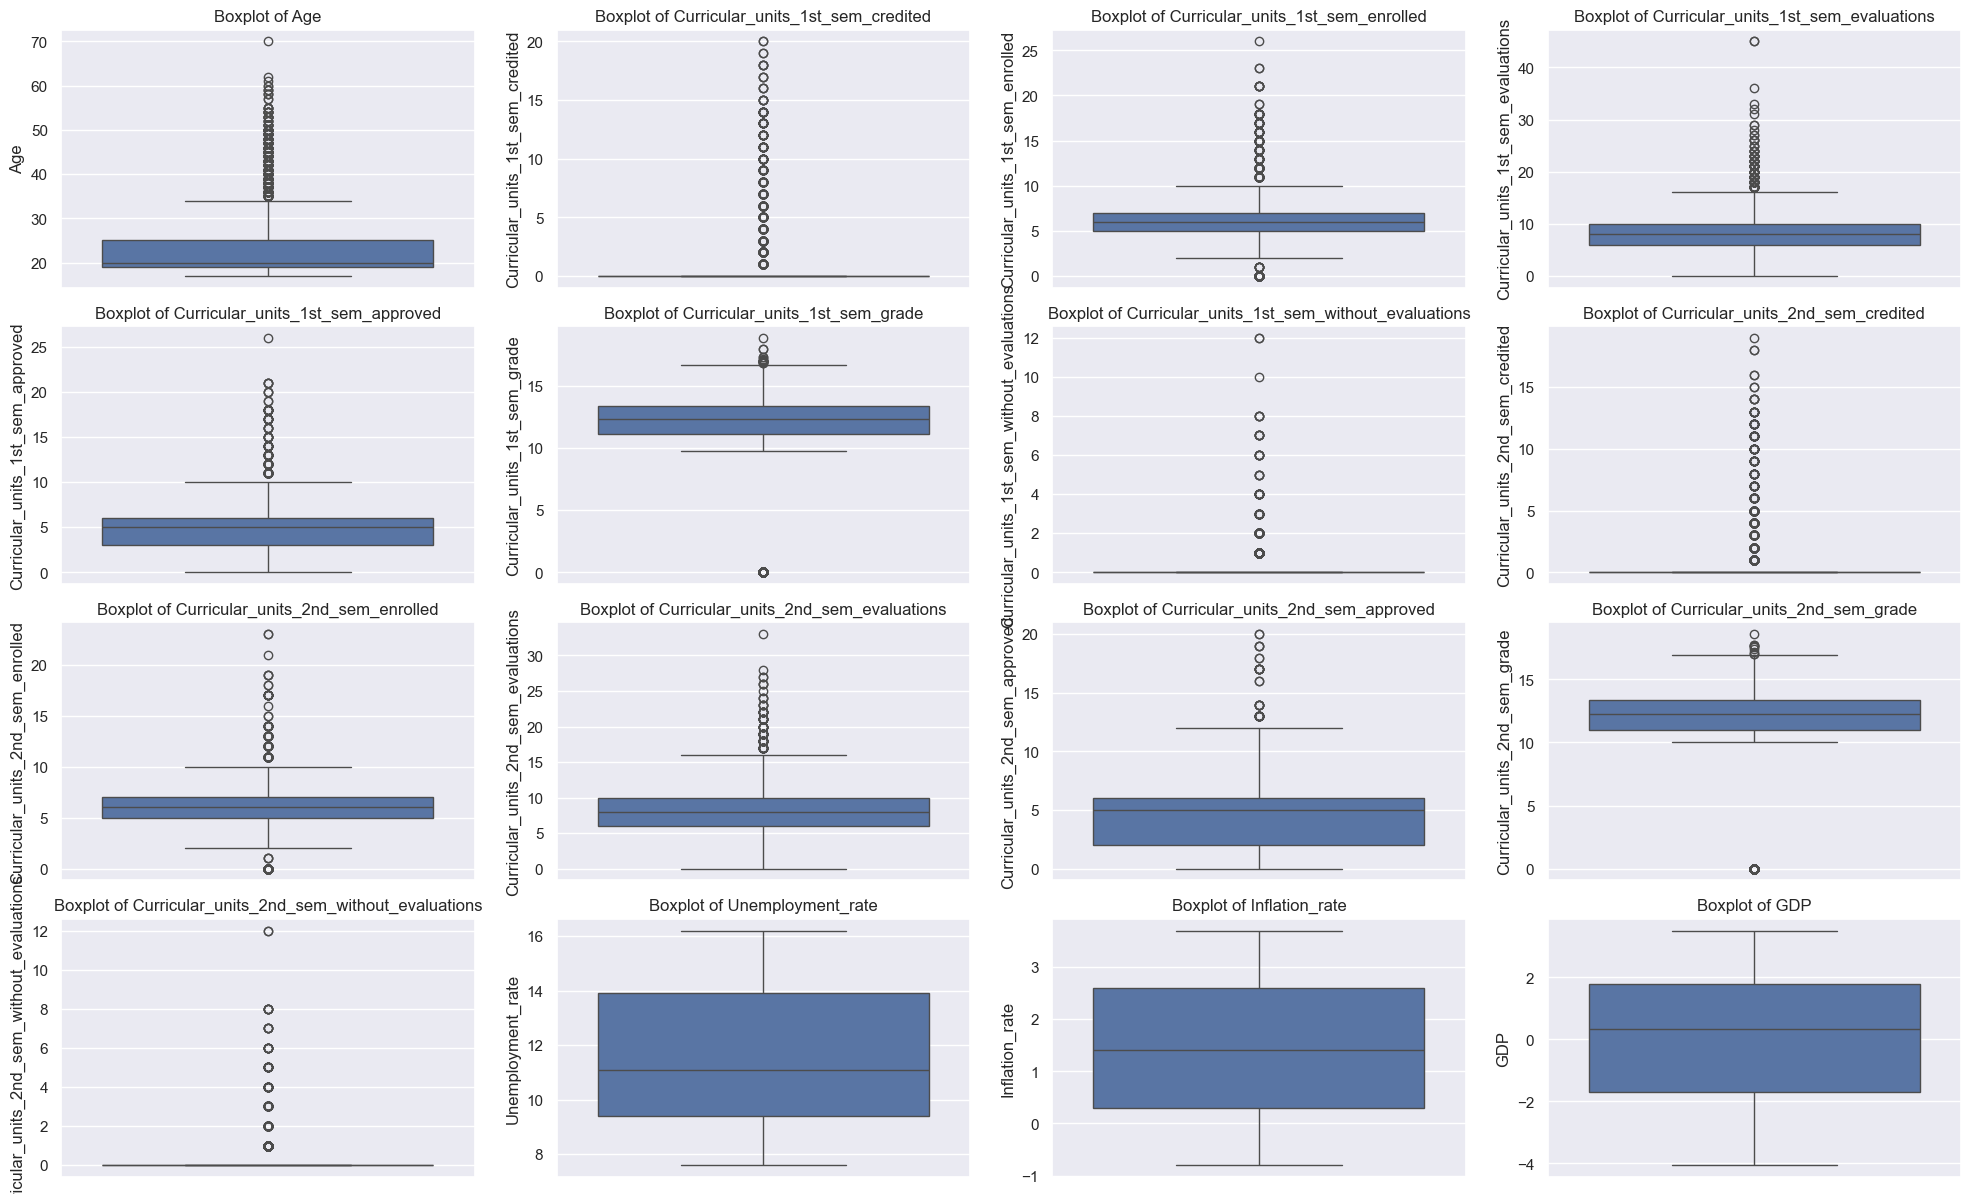

In [83]:
# Plot boxplots for numerical columns to detect outliers
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns needed for the subplots
num_rows = 5  # Increased number of rows to 5
num_cols = 4  # Increased number of columns to 4

plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Use num_rows and num_cols
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [84]:
# Encode the labels as ordinal data (0 - 'Dropout', 1 - 'Enrolled', and 2 - 'Graduate')
df['Target_encoded'] = OrdinalEncoder(categories = [['Dropout', 'Enrolled', 'Graduate']]).fit_transform(df[['Target']])

# Drop 'Target' variable
df.drop('Target', axis = 1, inplace = True)

/var/folders/qb/8q46b91x0jvbcmpx5sk7229c0000gn/T/ipykernel_18737/3604720186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target_encoded'] = OrdinalEncoder(categories = [['Dropout', 'Enrolled', 'Graduate']]).fit_transform(df[['Target']])
/var/folders/qb/8q46b91x0jvbcmpx5sk7229c0000gn/T/ipykernel_18737/3604720186.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Target', axis = 1, inplace = True)


### Chi-square variables test for Categorical Variables

$ H_0 $: the two variables are independent\
$ H_a$: the two variables are dependent

$\alpha = 0.05$

We will reject the null hypothesis and accept the alternative hypothesis if the p-value is less than 0.05, meaning the two variables are dependent. If the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis, meaning the two variables are independent.

In [85]:
# list of categorical features
cats = ['Marital_status', 'Application_mode', 'Application_order',
        'Course','Daytime/evening_attendance', 'Previous_qualification',
        'Nationality','Mother_qualification', 'Father_qualification',
        'Mother_occupation', 'Father_occupation', 'Displaced',
        'Educational_special_needs', 'Debtor','Tuition_fees_up_to_date',
        'Gender', 'Scholarship_holder','International']

# Get the p-values from Chi-Square indenpendence tests
p_value = []

for col in cats:
    crosstable = pd.crosstab(index = df[col],
                             columns = df['Target_encoded'])
    p = chi2_contingency(crosstable)[1]
    p_value.append(p)

chi2_result = pd.DataFrame({
    'Variable': cats,
    'P_value': [round(ele, 5) for ele in p_value]
})

chi2_result = chi2_result.sort_values('P_value')

chi2_result

,Variable,P_value
0,Marital_status,0.00000
15,Gender,0.00000
14,Tuition_fees_up_to_date,0.00000
13,Debtor,0.00000
11,Displaced,0.00000
10,Father_occupation,0.00000
9,Mother_occupation,0.00000
16,Scholarship_holder,0.00000
8,Father_qualification,0.00000
5,Previous_qualification,0.00000


Most of the p-values are close to zero, except for three variables (`Nationality`, `International`, `Educational_special_needs`) with very high p-values (0.24, 0.53, 0.73), indicating that no statistically significant association between these three features and the label. We will exclude them from modeling.

In [86]:
stud_selected = df.drop(['Nationality', 'International', 'Educational_special_needs'],
                              axis = 1)
stud_selected.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime/evening_attendance', 'Previous_qualification',
       'Mother_qualification', 'Father_qualification', 'Mother_occupation',
       'Father_occupation', 'Displaced', 'Debtor', 'Tuition_fees_up_to_date',
       'Gender', 'Scholarship_holder', 'Age',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
       'Inflation_rate', 'GDP', 'Target_encoded'],
      dtype='object')

### ANOVA 

Use ANOVA test to compare the means of each numerical feature across the different target groups (dropout, enrolled or graduate)

In addition to the p-va;ue, the code calculates the effect size using $\eta^2$ which measures the proportion of the total variance in the deature that is explained by the group differences.

In [87]:
from scipy.stats import f_oneway

# List of numerical features (continuous)
nums = ['Age',
        'Curricular_units_1st_sem_credited',
        'Curricular_units_1st_sem_enrolled',
        'Curricular_units_1st_sem_evaluations',
        'Curricular_units_1st_sem_approved',
        'Curricular_units_1st_sem_grade',
        'Curricular_units_1st_sem_without_evaluations',
        'Curricular_units_2nd_sem_credited',
        'Curricular_units_2nd_sem_enrolled',
        'Curricular_units_2nd_sem_evaluations',
        'Curricular_units_2nd_sem_approved',
        'Curricular_units_2nd_sem_grade',
        'Curricular_units_2nd_sem_without_evaluations',
        'Unemployment_rate',
        'GDP']

# Get p-values and effect sizes from ANOVA
p_values = []
eta_squared = []

# Use 'stud_selected' instead of 'df' here
for col in nums:
    groups = [group[col].values
              for name, group in stud_selected.groupby('Target_encoded')]

    # ANOVA test
    f_stat, p = f_oneway(*groups)
    p_values.append(p)

    # Effect size calculation
    grand_mean = np.concatenate(groups).mean()
    ss_between = sum(len(g) * (np.mean(g) - grand_mean)**2 for g in groups)
    ss_total = sum((x - grand_mean)**2 for x in np.concatenate(groups))
    eta_squared.append(ss_between / ss_total)

# Create results dataframe
anova_result = pd.DataFrame({
    'Variable': nums,
    'P_value': [round(p, 5) for p in p_values],
    'Eta_squared': [round(eta, 5) for eta in eta_squared]
}).sort_values('P_value')

# Display significant results first
print("ANOVA Results (Sorted by P-value):")
display(anova_result)

# Optional: Highlight statistically significant results
# anova_result.style.apply(
#     lambda x: ['background: lightgreen' if x.P_value < 0.05 else '' for i in x],
#     axis=1
# )

ANOVA Results (Sorted by P-value):


,Variable,P_value,Eta_squared
0,Age,0.00000,0.06313
2,Curricular_units_1st_sem_enrolled,0.00000,0.04833
3,Curricular_units_1st_sem_evaluations,0.00000,0.01880
4,Curricular_units_1st_sem_approved,0.00000,0.32558
5,Curricular_units_1st_sem_grade,0.00000,0.30773
8,Curricular_units_2nd_sem_enrolled,0.00000,0.06297
9,Curricular_units_2nd_sem_evaluations,0.00000,0.04409
10,Curricular_units_2nd_sem_approved,0.00000,0.44263
11,Curricular_units_2nd_sem_grade,0.00000,0.40359
12,Curricular_units_2nd_sem_without_evaluations,0.00000,0.00867


$\eta^2$ value is measured on the interval $[0,1]$. The higher $\eta^2$ value (closer to 1) mean that a larger proportion of the variance is due to group differences, indicating a stronger association between the feature and the target.

In [88]:
important_feature=stud_selected.drop(['Curricular_units_1st_sem_credited',
                       'Curricular_units_2nd_sem_credited',
                       'Curricular_units_1st_sem_without_evaluations',
                       'Curricular_units_2nd_sem_without_evaluations',
                       'Unemployment_rate',
                       'GDP'],axis=1)
important_feature.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime/evening_attendance', 'Previous_qualification',
       'Mother_qualification', 'Father_qualification', 'Mother_occupation',
       'Father_occupation', 'Displaced', 'Debtor', 'Tuition_fees_up_to_date',
       'Gender', 'Scholarship_holder', 'Age',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Inflation_rate', 'Target_encoded'],
      dtype='object')

In [89]:
# important_features = [
#     # Categorical features (from Chi-square, p < 0.05)
#     'Marital_status',
#     'Application_mode',
#     'Application_order',
#     'Course',
#     'Daytime/evening_attendance',
#     'Previous_qualification',
#     'Mother_qualification',
#     'Father_qualification',
#     'Debtor',
#     'Mother_occupation',
#     'Father_occupation',
#     'Displaced',
#     'Gender',
#     'Tuition_fees_up_to_date',
#     'Scholarship_holder',

#     # Numerical features (from ANOVA, p < 0.05 AND eta-squared > 0.01)
#     'Age',
#     'Curricular_units_1st_sem_enrolled',
#     'Curricular_units_1st_sem_evaluations',
#     'Curricular_units_1st_sem_approved',
#     'Curricular_units_1st_sem_grade',
#     'Curricular_units_2nd_sem_approved',
#     'Curricular_units_2nd_sem_evaluations',
#     'Curricular_units_2nd_sem_enrolled',
#     'Curricular_units_2nd_sem_grade'
# ]
# important_features

# 6. FEATURE ENGINEERING

In [91]:

# Averaging academic performance data across two semesters
# stud_selected['avg_credited'] = stud_selected[['Curricular_units_1st_sem_credited',
#                                 'Curricular_units_2nd_sem_credited']].mean(axis = 1)
important_feature['avg_enrolled'] = important_feature[['Curricular_units_1st_sem_enrolled',
                                'Curricular_units_2nd_sem_enrolled']].mean(axis = 1)
important_feature['avg_evaluations'] = important_feature[['Curricular_units_1st_sem_evaluations',
                                   'Curricular_units_2nd_sem_evaluations']].mean(axis = 1)
important_feature['avg_approved'] = important_feature[['Curricular_units_1st_sem_approved',
                                'Curricular_units_2nd_sem_approved']].mean(axis = 1)
important_feature['avg_grade'] = important_feature[['Curricular_units_1st_sem_grade',
                             'Curricular_units_2nd_sem_grade']].mean(axis = 1)
# stud_selected['avg_without_evaluations'] = stud_selected[['Curricular_units_1st_sem_without_evaluations',
#                                            'Curricular_units_2nd_sem_without_evaluations']].mean(axis = 1)

### Spearman Correlation Matrix

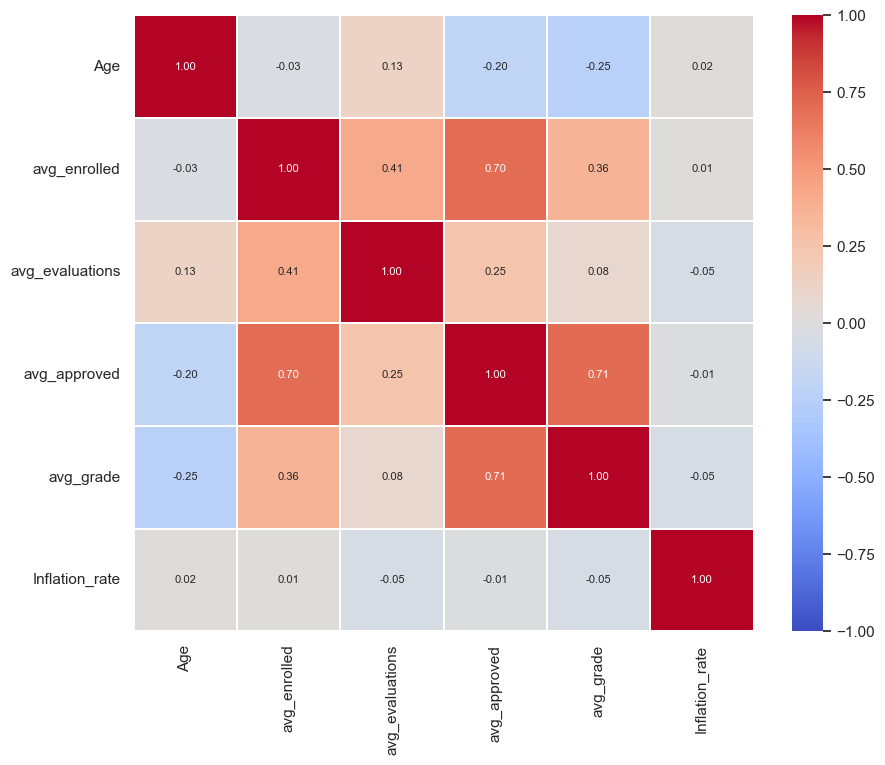

In [92]:
# plot the heat map of correlation matrix again
num_features = important_feature[['Age', 'avg_enrolled',
                              'avg_evaluations', 'avg_approved',
                              'avg_grade',
                              'Inflation_rate'
                              ]]

plt.figure(figsize = (10, 8))
plt.rcParams.update({'font.size': 8})
sns.heatmap(num_features.corr(method = 'spearman'), vmin = -1, vmax = 1, center = 0,
            cmap = 'coolwarm', fmt = '.2f', linewidths = .2, annot = True);

The Spearman correlation measures the strength and direction of the monotonic relationship between two variables, making it robust to outliers and suitable for both linear and non-linear associations. Each value in the matrix ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no correlation.

### Boxplots

Use boxplots to compare te central tendency, spread, and presence of outliers across groups.

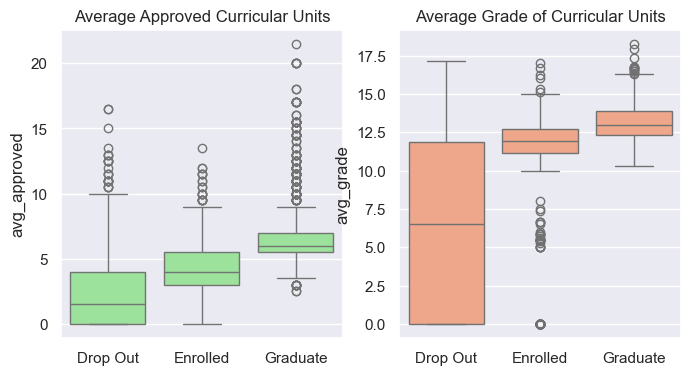

In [93]:
#check how 'curri_avg_approved' and 'curri_avg_grade' are associated with `target_encoded`
# Plot 'avg_approved' and 'avg_grade' vs. Target
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
sns.boxplot(data = important_feature , x = 'Target_encoded', y = 'avg_approved',
            color = 'lightgreen', ax = ax1)
ax1.set_title('Average Approved Curricular Units')
ax1.set_xlabel("")
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['Drop Out', 'Enrolled', 'Graduate']);

sns.boxplot(data = important_feature, x = 'Target_encoded', y = 'avg_grade',
            color = 'lightsalmon', ax = ax2)
ax2.set_title('Average Grade of Curricular Units')
ax2.set_xlabel("")
ax2.set_xticks([0, 1, 2])
ax2.set_xticklabels(['Drop Out', 'Enrolled', 'Graduate']);

In [94]:
# Check the rows with zero average approved curricular units and students being graduade
important_feature.loc[(important_feature['avg_approved'] == 0) & (important_feature['Target_encoded'] == 2)]

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,...,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Inflation_rate,Target_encoded,avg_enrolled,avg_evaluations,avg_approved,avg_grade


In [95]:
# stud_selected.describe()

In [96]:
# Remove the outliers
important_feature = important_feature .drop(important_feature .loc[(important_feature ['avg_approved'] == 0) & (important_feature ['Target_encoded'] == 2)].index)

# Check the rows with zero average grade and students being graduade
important_feature .loc[(important_feature ['avg_grade'] == 0) & (important_feature ['Target_encoded'] == 2)]

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,...,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Inflation_rate,Target_encoded,avg_enrolled,avg_evaluations,avg_approved,avg_grade


In [97]:
# def anova_effect_size(df, num_features, Target_encoded):
#     groups = [group[num_features].values
#               for name, group in df.groupby(Target_encoded)]
#     f_stat, p = f_oneway(*groups)

#     # Calculate Eta Squared
#     ss_between = sum(len(g)*(np.mean(g)-np.mean(np.concatenate(groups)))**2 for g in groups)
#     ss_total = sum((x-np.mean(np.concatenate(groups)))**2 for x in np.concatenate(groups))
#     eta_sq = ss_between / ss_total

#     print(f"F-statistic: {f_stat:.3f}, p-value: {p:.4f}")
#     print(f"Eta Squared: {eta_sq:.3f}")
#     print("Interpretation: 0.01=Small, 0.06=Medium, 0.14=Large")

# # Example
# anova_effect_size(df, 'Curricular_units_1st_sem_grade', 'Target')

In [98]:
# Drop unselected features along with the features that have been aggregated into new ones
important_feature  = important_feature.drop(columns = ['Inflation_rate',
                                              'avg_evaluations',
                                              'Curricular_units_1st_sem_enrolled',
                                              'Curricular_units_1st_sem_evaluations',
                                              'Curricular_units_1st_sem_approved',
                                              'Curricular_units_1st_sem_grade',
                                              'Curricular_units_2nd_sem_enrolled',
                                              'Curricular_units_2nd_sem_evaluations',
                                              'Curricular_units_2nd_sem_approved',
                                              'Curricular_units_2nd_sem_grade'
                                              ])
important_feature.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime/evening_attendance', 'Previous_qualification',
       'Mother_qualification', 'Father_qualification', 'Mother_occupation',
       'Father_occupation', 'Displaced', 'Debtor', 'Tuition_fees_up_to_date',
       'Gender', 'Scholarship_holder', 'Age', 'Target_encoded', 'avg_enrolled',
       'avg_approved', 'avg_grade'],
      dtype='object')

In [99]:
important_feature.shape

(4347, 20)

In [100]:
important_feature['Target_encoded'].value_counts()

Target_encoded
2.0    2132
0.0    1421
1.0     794
Name: count, dtype: int64

## MODEL SELECTION & EVALUATION

### Model 1 - Random Forest

In [ ]:
# --- Step 1: Filter and Remap Labels ---

filtered_df = df[df["Target_encoded"].isin([0, 2])]  # Keep Dropout (0) and Graduate (2)
X = filtered_df.drop("Target_encoded", axis=1)
y = filtered_df["Target_encoded"].replace({2: 1})  # Remap Graduate=2 → 1
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# --- Step 2: Scale Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
# Tune hyperparameter of Random Forest
parm = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 3, 5],
    'max_samples': [0.5, 0.75, 1]
}

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [104]:
rsv_rf_bi = RandomizedSearchCV( estimator = RandomForestClassifier(class_weight = 'balanced',
                                                                   random_state = 42),
                                param_distributions = parm, scoring = 'balanced_accuracy',
                                n_iter = 30, n_jobs = -1,  random_state = 0)

rsv_rf_bi.fit(X_train_scaled, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 15],
                                        'max_samples': [0.5, 0.75, 1],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 300, 500]},
                   random_state=0, scoring='balanced_accuracy')

In [105]:
# Get the best estimator
tuned_rf_bi = rsv_rf_bi.best_estimator_

# Check the model performance
y_pred = tuned_rf_bi.predict(X_test_scaled)
y_prob = tuned_rf_bi.predict_proba(X_test_scaled)

In [106]:
tuned_rf_bi_accuracy = round(balanced_accuracy_score(y_test, y_pred), 3)
tuned_rf_bi_f1score = round(f1_score(y_test, y_pred), 3)
tuned_rf_bi_auc = round(roc_auc_score(y_test, y_prob[:, 1]), 3)

print('tuned_rf_bi Performance:')
print('Balanced Accuracy:', tuned_rf_bi_accuracy)
print('F1 Score:', tuned_rf_bi_f1score)
print('AUC score:', tuned_rf_bi_auc)

tuned_rf_bi Performance:
Balanced Accuracy: 0.9
F1 Score: 0.926
AUC score: 0.958


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.84      0.88       291
         1.0       0.90      0.96      0.93       420

    accuracy                           0.91       711
   macro avg       0.91      0.90      0.91       711
weighted avg       0.91      0.91      0.91       711



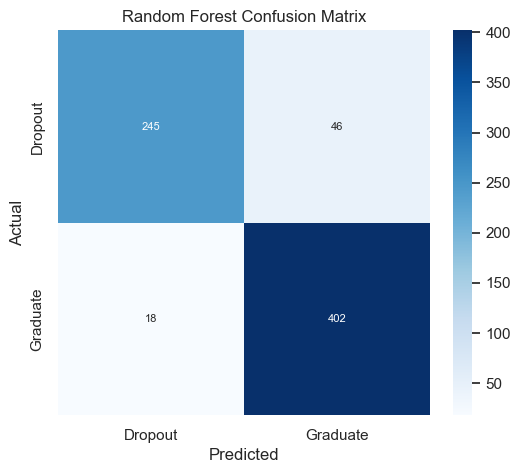

In [107]:
from sklearn.metrics import classification_report

# Evaluate the tuned random forest model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Dropout', 'Graduate'],
            yticklabels=['Dropout', 'Graduate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

### Model 2 - Extreme Gradient Boost

In [108]:
# Tune the hyperparameters of XGBClassifier
param = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 8],
    'min_child_weight': [1, 5, 7],
    'subsample': [0.5, 0.75, 1],
    'colsample_bytree': [0.5, 0.75, 1],
    'gamma': [0, 0.5, 0.8]
}

rsv_xgb_bi = RandomizedSearchCV(estimator = XGBClassifier(enable_categorical = True,
                                                          # scale_pos_weight = weight,
                                                          random_state = 42),
                                param_distributions = param, scoring = 'balanced_accuracy',
                                n_iter= 50, n_jobs = -1, random_state = 6)

rsv_xgb_bi.fit(X_train_scaled, y_train)

# Extract best estimator
tuned_xgb_bi = rsv_xgb_bi.best_estimator_

# Check 'tuned_xgb_bi' performance
y_pred = tuned_xgb_bi.predict(X_test_scaled)
y_prob = tuned_xgb_bi.predict_proba(X_test_scaled)

tuned_xgb_bi_accuracy = round(balanced_accuracy_score(y_test, y_pred), 3)
tuned_xgb_bi_f1score = round(f1_score(y_test, y_pred), 3)
tuned_xgb_bi_auc = round(roc_auc_score(y_test, y_prob[:, 1]), 3)

print('tuned_xgb_bi performance:')
print('Balanced accuracy:', tuned_xgb_bi_accuracy)
print('F1 score:', tuned_xgb_bi_f1score)
print('AUC score:', tuned_xgb_bi_auc)

tuned_xgb_bi performance:
Balanced accuracy: 0.915
F1 score: 0.938
AUC score: 0.968


XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90       291
         1.0       0.91      0.97      0.94       420

    accuracy                           0.92       711
   macro avg       0.93      0.91      0.92       711
weighted avg       0.93      0.92      0.92       711



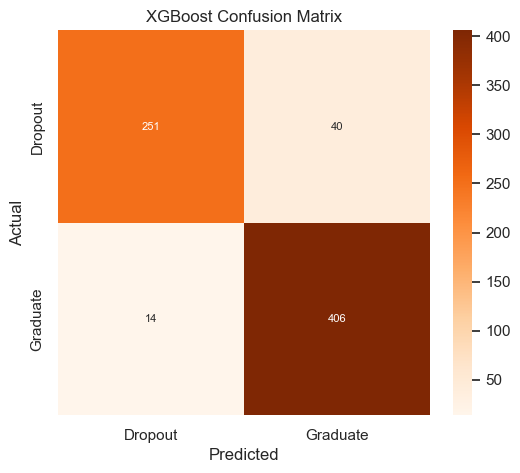

In [109]:
# Evaluate the tuned XGBoost model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=['Dropout', 'Graduate'],
            yticklabels=['Dropout', 'Graduate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

### Model 3 - Logistic Regression

In [110]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'class_weight': ['balanced']
}

# Set up RandomizedSearchCV
logreg_search = RandomizedSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_distributions=param_grid,
    n_iter=10,
    scoring='balanced_accuracy',
    n_jobs=-1,
    cv=5,
    random_state=42
)

# Fit on training data
logreg_search.fit(X_train_scaled, y_train)

# Best estimator
best_logreg = logreg_search.best_estimator_

# Predict on the test set
y_pred_logreg = best_logreg.predict(X_test_scaled)
y_prob_logreg = best_logreg.predict_proba(X_test_scaled)

# Evaluate performance
logreg_accuracy = round(balanced_accuracy_score(y_test, y_pred_logreg), 3)
logreg_f1score = round(f1_score(y_test, y_pred_logreg), 3)
logreg_auc = round(roc_auc_score(y_test, y_prob_logreg[:, 1]), 3)

print('Tuned Logistic Regression Performance:')
print('Balanced Accuracy:', logreg_accuracy)
print('F1 Score:', logreg_f1score)
print('AUC score:', logreg_auc)

Tuned Logistic Regression Performance:
Balanced Accuracy: 0.915
F1 Score: 0.934
AUC score: 0.96


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90       291
         1.0       0.92      0.95      0.93       420

    accuracy                           0.92       711
   macro avg       0.92      0.92      0.92       711
weighted avg       0.92      0.92      0.92       711



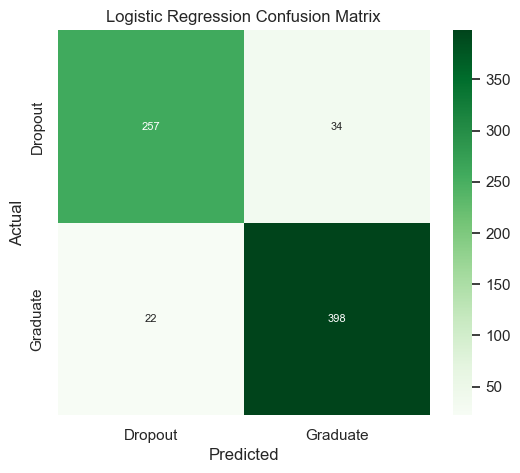

In [111]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Print classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Dropout', 'Graduate'],
            yticklabels=['Dropout', 'Graduate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

### Model 4 - KNN

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score

# Define hyperparameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

# Set up RandomizedSearchCV for KNN
knn_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=knn_param_grid,
    n_iter=15,
    scoring='balanced_accuracy',
    n_jobs=-1,
    cv=5,
    random_state=42
)

# Fit on training data
knn_search.fit(X_train_scaled, y_train)

# Best estimator
best_knn = knn_search.best_estimator_

# Predict on the test set
y_pred_knn = best_knn.predict(X_test_scaled)
y_prob_knn = best_knn.predict_proba(X_test_scaled)

# Evaluate performance

knn_accuracy = round(balanced_accuracy_score(y_test, y_pred_knn), 3)
knn_f1score = round(f1_score(y_test, y_pred_knn), 3)
knn_auc = round(roc_auc_score(y_test, y_prob_knn[:, 1]), 3)

print('Tuned KNN Performance:')
print('Balanced Accuracy:', knn_accuracy)
print('F1 Score:', knn_f1score)
print('AUC score:', knn_auc)

Tuned KNN Performance:
Balanced Accuracy: 0.839
F1 Score: 0.894
AUC score: 0.923


KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.70      0.81       291
         1.0       0.83      0.97      0.89       420

    accuracy                           0.86       711
   macro avg       0.89      0.84      0.85       711
weighted avg       0.88      0.86      0.86       711



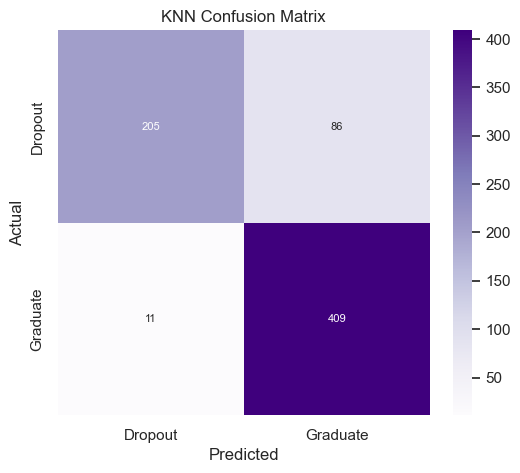

In [113]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Print classification report for KNN
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Plot confusion matrix for KNN
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=['Dropout', 'Graduate'],
            yticklabels=['Dropout', 'Graduate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

### Model 5 - SVC

In [114]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score

# Define hyperparameter grid for SVC
svc_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced']
}

# Set up RandomizedSearchCV for SVC
svc_search = RandomizedSearchCV(
    SVC(probability=True, random_state=42),
    param_distributions=svc_param_grid,
    n_iter=15,
    scoring='balanced_accuracy',
    n_jobs=-1,
    cv=5,
    random_state=42
)

# Fit on training data
svc_search.fit(X_train_scaled, y_train)

# Best estimator
best_svc = svc_search.best_estimator_

# Predict on the test set
y_pred_svc = best_svc.predict(X_test_scaled)
y_prob_svc = best_svc.predict_proba(X_test_scaled)

# Evaluate performance
svc_accuracy = round(balanced_accuracy_score(y_test, y_pred_svc), 3)
svc_f1score = round(f1_score(y_test, y_pred_svc), 3)
svc_auc = round(roc_auc_score(y_test, y_prob_svc[:, 1]), 3)

print('Tuned SVC Performance:')
print('Balanced Accuracy:', svc_accuracy)
print('F1 Score:', svc_f1score)
print('AUC score:', svc_auc)

Tuned SVC Performance:
Balanced Accuracy: 0.908
F1 Score: 0.928
AUC score: 0.957


KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.70      0.81       291
         1.0       0.83      0.97      0.89       420

    accuracy                           0.86       711
   macro avg       0.89      0.84      0.85       711
weighted avg       0.88      0.86      0.86       711



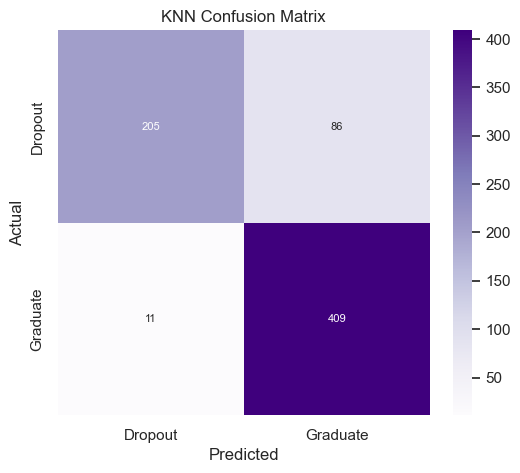

In [115]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Print classification report for KNN
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Plot confusion matrix for KNN
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=['Dropout', 'Graduate'],
            yticklabels=['Dropout', 'Graduate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

### Model 6 - Naive Bayes

In [116]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score

# Define hyperparameter grid for GaussianNB
nb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Set up GridSearchCV for Naive Bayes
nb_search = GridSearchCV(
    GaussianNB(),
    param_grid=nb_param_grid,
    scoring='balanced_accuracy',
    n_jobs=-1,
    cv=5
)

# Fit on training data
nb_search.fit(X_train_scaled, y_train)

# Best estimator
best_nb = nb_search.best_estimator_

# Predict on the test set
y_pred_nb = best_nb.predict(X_test_scaled)
y_prob_nb = best_nb.predict_proba(X_test_scaled)

# Evaluate performance

nb_accuracy = round(balanced_accuracy_score(y_test, y_pred_nb), 3)
nb_f1score = round(f1_score(y_test, y_pred_nb), 3)
nb_auc = round(roc_auc_score(y_test, y_prob_nb[:, 1]), 3)

print('Tuned Naive Bayes Performance:')
print('Balanced Accuracy:', nb_accuracy)
print('F1 Score:', nb_f1score)
print('AUC score:', nb_auc)

Tuned Naive Bayes Performance:
Balanced Accuracy: 0.84
F1 Score: 0.881
AUC score: 0.912


Naive Bayes Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.76      0.81       291
         1.0       0.85      0.92      0.88       420

    accuracy                           0.85       711
   macro avg       0.86      0.84      0.85       711
weighted avg       0.85      0.85      0.85       711



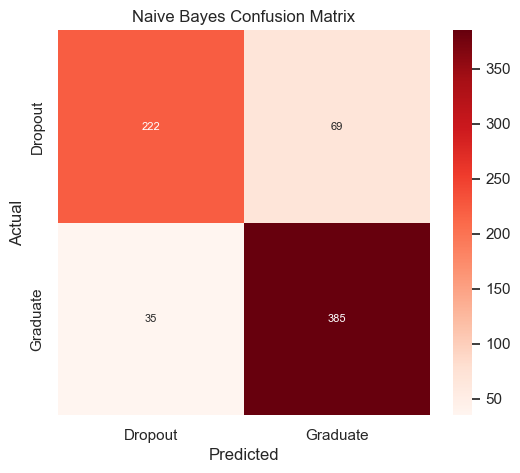

In [117]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Print classification report for Naive Bayes
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Plot confusion matrix for Naive Bayes
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=['Dropout', 'Graduate'],
            yticklabels=['Dropout', 'Graduate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [118]:
# Collect performance metrics for all six models
model_names = [
    "Random Forest",
    "XGBoost",
    "Logistic Regression",
    "KNN",
    "SVC",
    "Naive Bayes"
]

accuracy_scores = [
    tuned_rf_bi_accuracy,
    tuned_xgb_bi_accuracy,
    logreg_accuracy,
    knn_accuracy,
    svc_accuracy,
    nb_accuracy
]

f1_scores = [
    tuned_rf_bi_f1score,
    tuned_xgb_bi_f1score,
    logreg_f1score,
    knn_f1score,
    svc_f1score,
    nb_f1score
]

auc_scores = [
    tuned_rf_bi_auc,
    tuned_xgb_bi_auc,
    logreg_auc,
    knn_auc,
    svc_auc,
    nb_auc
]

# Create a summary DataFrame
model_comparison = pd.DataFrame({
    "Model": model_names,
    "Balanced Accuracy": accuracy_scores,
    "F1 Score": f1_scores,
    "AUC": auc_scores
})

# Sort by AUC (or any other metric you prefer)
model_comparison = model_comparison.sort_values("AUC", ascending=False).reset_index(drop=True)
display(model_comparison)

# Select the best model (highest AUC)
best_model_name = model_comparison.iloc[0]["Model"]
print(f"Best model based on AUC: {best_model_name}")

,Model,Balanced Accuracy,F1 Score,AUC
0,XGBoost,0.915,0.938,0.968
1,Logistic Regression,0.915,0.934,0.960
2,Random Forest,0.900,0.926,0.958
3,SVC,0.908,0.928,0.957
4,KNN,0.839,0.894,0.923
5,Naive Bayes,0.840,0.881,0.912


Best model based on AUC: XGBoost


In [119]:
# from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.svm import SVC
# import pandas as pd

# # Define top 3 models and their parameter grids

# # Parameter grids (reuse best grids from previous tuning)
# rf_param_grid = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [None, 10, 15],
#     'min_samples_split': [2, 5, 7],
#     'min_samples_leaf': [1, 3, 5],
#     'max_samples': [0.5, 0.75, 1]
# }
# xgb_param_grid = {
#     'n_estimators': [100, 300, 500],
#     'learning_rate': [0.05, 0.1, 0.2, 0.3],
#     'max_depth': [3, 5, 8],
#     'min_child_weight': [1, 5, 7],
#     'subsample': [0.5, 0.75, 1],
#     'colsample_bytree': [0.5, 0.75, 1],
#     'gamma': [0, 0.5, 0.8]
# }
# svc_param_grid = svc_param_grid  # already defined

# # Models
# models = [
#     ('Random Forest', RandomForestClassifier(class_weight='balanced', random_state=42), rf_param_grid),
#     ('XGBoost', XGBClassifier(enable_categorical=True, random_state=42), xgb_param_grid),
#     ('SVC', SVC(probability=True, random_state=42), svc_param_grid)
# ]

# outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# results = {}

# for name, model, param_grid in models:
#     inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
#     grid = GridSearchCV(model, param_grid, scoring='balanced_accuracy', cv=inner_cv, n_jobs=-1)
#     nested_score = cross_val_score(grid, X_train_scaled, y_train, cv=outer_cv, scoring='balanced_accuracy', n_jobs=-1)
#     results[name] = nested_score
#     print(f"{name} Nested CV Balanced Accuracy: Mean={nested_score.mean():.3f}, Std={nested_score.std():.3f}")

# # Optionally, display all results
# nested_cv_df = pd.DataFrame({k: v for k, v in results.items()})
# display(nested_cv_df)

In [120]:
from sklearn.model_selection import cross_val_score

# Define top 3 models with best hyperparameters
top_models = [
    ("Random Forest", tuned_rf_bi),
    ("XGBoost", tuned_xgb_bi),
    ("SVC", best_svc)
]

cv_results = {}

for name, model in top_models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=outer_cv, scoring='balanced_accuracy', n_jobs=-1)
    cv_results[name] = scores
    print(f"{name} CV Balanced Accuracy: Mean={scores.mean():.3f}, Std={scores.std():.3f}")

# Optionally, display as DataFrame
cv_df = pd.DataFrame(cv_results)
display(cv_df)

Random Forest CV Balanced Accuracy: Mean=0.904, Std=0.013
XGBoost CV Balanced Accuracy: Mean=0.906, Std=0.013
SVC CV Balanced Accuracy: Mean=0.917, Std=0.008


,Random Forest,XGBoost,SVC
0,0.888935,0.887426,0.906531
1,0.910202,0.901455,0.916187
2,0.924895,0.928608,0.932322
3,0.894789,0.908063,0.913238
4,0.902060,0.905023,0.916084


In [121]:
# Cost-sensitive metrics for Random Forest, XGBoost, and SVC

# Get predictions for Random Forest and XGBoost
y_pred_rf = tuned_rf_bi.predict(X_test_scaled)
y_pred_xgb = tuned_xgb_bi.predict(X_test_scaled)
# SVC predictions already available as y_pred_svc

# Use the same cost matrix as before
cost_matrix = [
    [0, 1],  # True 0: [TN cost, FP cost]
    [5, 0]   # True 1: [FN cost, TP cost]
]

def cost_sensitive_score(y_true, y_pred, cost_matrix):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    total_cost = (
        cm[0, 1] * cost_matrix[0][1] +  # FP
        cm[1, 0] * cost_matrix[1][0]    # FN
    )
    avg_cost = total_cost / len(y_true)
    return total_cost, avg_cost

# Random Forest
total_cost_rf, avg_cost_rf = cost_sensitive_score(y_test, y_pred_rf, cost_matrix)
print(f"Random Forest - Total Cost: {total_cost_rf}, Average Cost per Sample: {avg_cost_rf:.4f}")

# XGBoost
total_cost_xgb, avg_cost_xgb = cost_sensitive_score(y_test, y_pred_xgb, cost_matrix)
print(f"XGBoost - Total Cost: {total_cost_xgb}, Average Cost per Sample: {avg_cost_xgb:.4f}")

# SVC
total_cost_svc, avg_cost_svc = cost_sensitive_score(y_test, y_pred_svc, cost_matrix)
print(f"SVC - Total Cost: {total_cost_svc}, Average Cost per Sample: {avg_cost_svc:.4f}")

Random Forest - Total Cost: 136, Average Cost per Sample: 0.1913
XGBoost - Total Cost: 110, Average Cost per Sample: 0.1547
SVC - Total Cost: 161, Average Cost per Sample: 0.2264


In [122]:
# Fit the training set into the best SVC model
best_svc = svc_search.best_estimator_
best_svc.fit(X_train_scaled, y_train)


SVC(C=0.1, class_weight='balanced', gamma='auto', kernel='linear',
    probability=True, random_state=42)

SVC Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89       291
         1.0       0.92      0.94      0.93       420

    accuracy                           0.91       711
   macro avg       0.91      0.91      0.91       711
weighted avg       0.91      0.91      0.91       711

Balanced Accuracy: 0.9083824251350024
F1 Score: 0.9283196239717979
AUC Score: 0.957380134184258


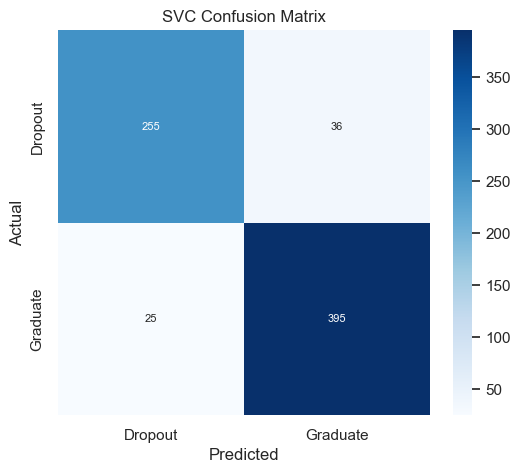

In [123]:
# Predict on the test set
y_pred_svc = best_svc.predict(X_test_scaled)
y_prob_svc = best_svc.predict_proba(X_test_scaled)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_svc))
print("F1 Score:", f1_score(y_test, y_pred_svc))
print("AUC Score:", roc_auc_score(y_test, y_prob_svc[:, 1]))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Dropout', 'Graduate'],
            yticklabels=['Dropout', 'Graduate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVC Confusion Matrix')
plt.show()

# 9. MODEL EVALUATION

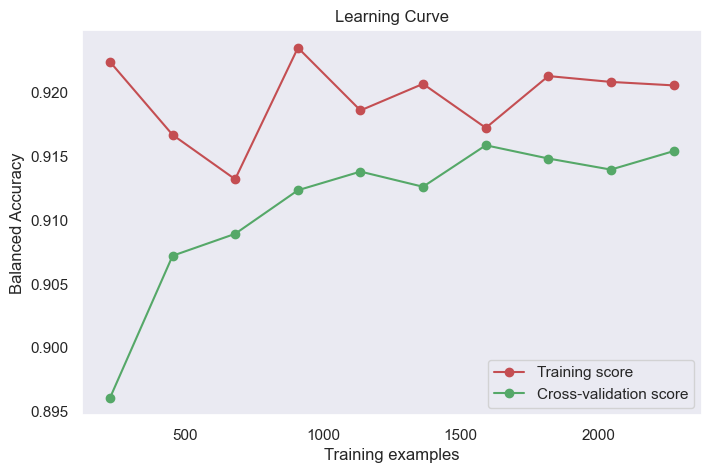

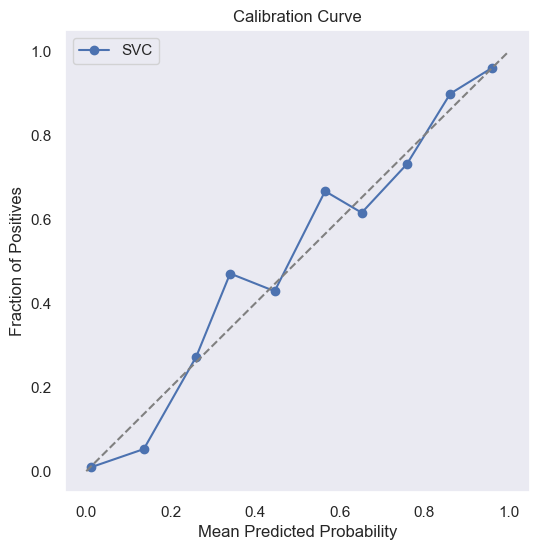

In [136]:
from sklearn.model_selection import learning_curve
from sklearn.calibration import calibration_curve
import numpy as np

# Use the best model from previous selection, e.g., best_svc
model = best_svc

# --- Learning Curve ---
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_scaled, y_train, cv=5, scoring='balanced_accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1, random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Balanced Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

# --- Calibration Curve ---
y_prob = model.predict_proba(X_test_scaled)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label='SVC')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Calibration Curve')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.grid()
plt.show()